In [128]:
from PIL import Image
import zipfile

In [ ]:
f=zipfile.ZipFile('./cupdata.zip','r')
for file in f.namelist():
    f.extract(file,"./cupdata") #解压到的位置，./表示当前目录(与此.ipynb文件同一个目录)
f.close()

In [129]:
import os
import cv2

In [3]:
def read_directory(directory_name):
    array_of_img=[]
    for filename in os.listdir(r"./"+directory_name):
        img = cv2.imread(directory_name + "/" + filename,3)
        array_of_img.append(img)
    return array_of_img

In [130]:
all_pic=read_directory('./cupdata')

In [131]:
all_pic=all_pic[1:]

In [120]:
f=zipfile.ZipFile('./cup2.zip','r')
for file in f.namelist():
    f.extract(file,"./cup2") #解压到的位置，./表示当前目录(与此.ipynb文件同一个目录)
f.close()

In [136]:
all_pic2=read_directory('./cup2')

In [137]:
all_pic2=all_pic2[1:]

In [138]:
from matplotlib import pyplot as plt

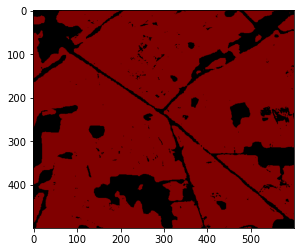

In [245]:
plt.imshow(all_pic2[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


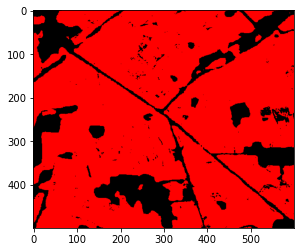

In [246]:
plt.imshow((all_pic2[0]/128)*255)

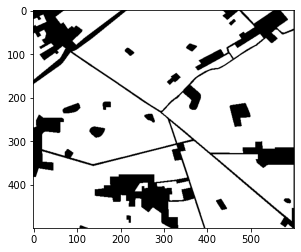

In [162]:
plt.imshow(all_pic[0])

In [163]:
all_pic[0].shape

(500, 600, 3)

In [164]:
all_pic2[0].shape

(500, 600, 3)

In [165]:
import numpy as np

In [166]:
all_pic2[0].shape

(500, 600, 3)

In [167]:
list_final=[]

In [168]:
for h in range(8):
    a=np.zeros((500,600,3))
    for i in range(500):
        for j in range(600):
            for t in range(3):
                if all_pic2[h][i,j,t]!=0:
                    a[i,j,t]=0
                if all_pic2[h][i,j,t]==0:
                    a[i,j,t]=1
    list_final.append(a)
                

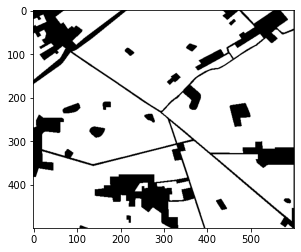

In [169]:
plt.imshow(all_pic[0])

In [170]:
all_pic[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [171]:
list_final[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [172]:
all_pic3=[]

In [173]:
for i in range(8):
    all_pic3.append(np.array(all_pic[i],dtype=int))
    

In [174]:
#每个像素的绝对距离

In [175]:
distance=[]

In [176]:
for i in range(8):
    a=all_pic3[i]-list_final[i]
    distance.append(a)

In [177]:
#占比差/占比

In [178]:
place_1=[]
place_2=[]

In [179]:
diff=[]

In [180]:
for i in range(8):
    diff.append(abs(sum(sum(sum(all_pic3[i]/255)))/(500*600*3)-sum(sum(sum(list_final[i])))/(500*600*3)))

In [181]:
for i in range(8):
    place_1.append(sum(sum(sum(all_pic3[i]/255)))/(500*600*3))
    place_2.append(sum(sum(sum(list_final[i])))/(500*600*3))

In [182]:
place_1

[0.8329266666666667,
 0.8422666666666667,
 0.70042,
 0.7468366666666667,
 0.5533533333333334,
 0.8556166666666667,
 0.6802366666666667,
 0.8389366666666667]

In [183]:
place_2

[0.7296188888888889,
 0.7122255555555556,
 0.7717566666666666,
 0.7530855555555556,
 0.8214644444444444,
 0.7151544444444444,
 0.7759477777777778,
 0.7132911111111111]

In [184]:
diff

[0.10330777777777778,
 0.13004111111111116,
 0.0713366666666666,
 0.006248888888888859,
 0.2681111111111111,
 0.14046222222222227,
 0.09571111111111108,
 0.12564555555555557]

In [185]:
arr_1=np.array(place_1)

In [186]:
arr_2=np.array(place_2)

In [187]:
#均方误差

In [188]:
a=(sum((arr_1-arr_2)**2))/8

In [189]:
a

0.01865897279320988

In [190]:
#均方根误差

In [191]:
a**0.5

0.1365978506170938

In [192]:
list_final[0].shape

(500, 600, 3)

In [193]:
#平均并交比

In [194]:
import numpy as np
import glob
import tqdm
from PIL import Image
import cv2 as cv
import os
from sklearn.metrics import confusion_matrix,cohen_kappa_score
from skimage import io
from skimage import measure
from scipy import ndimage
from sklearn.metrics import f1_score

In [195]:
def compute_f1(prediction, target):
    """
    :param prediction: 2d array, int,
            estimated targets as returned by a classifier
    :param target: 2d array, int,
            ground truth
    :return:
        f1: float
    """
    prediction.tolist(), target.tolist()
    img, target = np.array(prediction).flatten(), np.array(target).flatten()
    f1 = f1_score(y_true=target, y_pred=img)
    return  f1

In [196]:
list_f1=[]

In [197]:
for i in range(8):
    list_f1.append(compute_f1(list_final[i],all_pic3[i]/255))

In [198]:
list_f1

[0.7339377127493527,
 0.7265223442024298,
 0.6585743407909226,
 0.6839006467001992,
 0.5570596830610279,
 0.7357716733607131,
 0.6369950082636051,
 0.7285313939463353]

In [199]:
def mean_iou(input, target, classes = 2):
    """  compute the value of mean iou
    :param input:  2d array, int, prediction
    :param target: 2d array, int, ground truth
    :param classes: int, the number of class
    :return:
        miou: float, the value of miou
    """
    miou = 0
    for i in range(classes):
        intersection = np.logical_and(target == i, input == i)
        # print(intersection.any())
        union = np.logical_or(target == i, input == i)
        temp = np.sum(intersection) / np.sum(union)
        miou += temp
    return  miou/classes

In [200]:
list_mean_iou=[]

In [201]:
for i in range(8):
    list_mean_iou.append(mean_iou(list_final[i],all_pic3[i]/255,classes=2))

In [202]:
list_mean_iou

[0.30257927190348854,
 0.29696062992309635,
 0.2576955014675971,
 0.2731413565042893,
 0.19960071094836082,
 0.2993980809413041,
 0.24076603526280602,
 0.3016741690767141]

In [232]:
def iou(input, target, classes=1):
    
    intersection = np.logical_and(target == classes, input == classes)
    
    union = np.logical_or(target == classes, input == classes)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [233]:
list_iou=[]

In [234]:
for i in range(8):
    list_iou.append(iou(list_final[i],all_pic3[i]/255,classes=1))

In [235]:
list_iou

[0.5797011096058754,
 0.5705026239721607,
 0.49095105365676905,
 0.5196421113538913,
 0.3860587139478952,
 0.5819927127535764,
 0.46734605678304075,
 0.5729841778850701]

In [207]:
def compute_kappa(prediction, target):
    """
    :param prediction: 2d array, int,
            estimated targets as returned by a classifier
    :param target: 2d array, int,
            ground truth
    :return:
        kappa: float
    """
    prediction.tolist(), target.tolist()
    img, target = np.array(prediction).flatten(), np.array(target).flatten()
    kappa = cohen_kappa_score(target, img)
    return  kappa

In [208]:
list_kappa=[]

In [209]:
for i in range(8):
    list_kappa.append(compute_kappa(np.array(list_final[i],dtype=int),np.array(all_pic3[i]/255,dtype=int)))

In [210]:
list_kappa

[-0.19771093253281258,
 -0.19844794846625935,
 -0.28529444851050867,
 -0.2641349496177765,
 -0.30763444203082346,
 -0.19617331916724168,
 -0.3197628591199171,
 -0.18560091197226347]

In [211]:
list_acc=[]

In [212]:
for i in range(8):
    matrix = confusion_matrix(y_true=np.array(all_pic3[i]).flatten(), y_pred=np.array(list_final[i]).flatten())
    acc = np.diag(matrix).sum() / matrix.sum()
    list_acc.append(acc)

In [213]:
list_acc

[0.01086,
 0.010194444444444445,
 0.012592222222222222,
 0.012976666666666666,
 0.00811,
 0.0070933333333333334,
 0.007606666666666667,
 0.013195555555555556]

In [214]:
"""
refer to https://github.com/jfzhang95/pytorch-deeplab-xception/blob/master/utils/metrics.py
"""
import numpy as np
__all__ = ['SegmentationMetric']
 
"""
confusionMetric  # 注意：此处横着代表预测值，竖着代表真实值，与之前介绍的相反
P\L     P    N
P      TP    FP
N      FN    TN
"""
class SegmentationMetric(object):
    def __init__(self, numClass):
        self.numClass = numClass
        self.confusionMatrix = np.zeros((self.numClass,)*2)
 
    def pixelAccuracy(self):
        # return all class overall pixel accuracy
        #  PA = acc = (TP + TN) / (TP + TN + FP + TN)
        acc = np.diag(self.confusionMatrix).sum() /  self.confusionMatrix.sum()
        return acc
 
    def classPixelAccuracy(self):
        # return each category pixel accuracy(A more accurate way to call it precision)
        # acc = (TP) / TP + FP
        classAcc = np.diag(self.confusionMatrix) / self.confusionMatrix.sum(axis=1)
        return classAcc # 返回的是一个列表值，如：[0.90, 0.80, 0.96]，表示类别1 2 3各类别的预测准确率
 
    def meanPixelAccuracy(self):
        classAcc = self.classPixelAccuracy()
        meanAcc = np.nanmean(classAcc) # np.nanmean 求平均值，nan表示遇到Nan类型，其值取为0
        return meanAcc # 返回单个值，如：np.nanmean([0.90, 0.80, 0.96, nan, nan]) = (0.90 + 0.80 + 0.96） / 3 =  0.89
 
    def meanIntersectionOverUnion(self):
        # Intersection = TP Union = TP + FP + FN
        # IoU = TP / (TP + FP + FN)
        intersection = np.diag(self.confusionMatrix) # 取对角元素的值，返回列表
        union = np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) - np.diag(self.confusionMatrix) # axis = 1表示混淆矩阵行的值，返回列表； axis = 0表示取混淆矩阵列的值，返回列表 
        IoU = intersection / union  # 返回列表，其值为各个类别的IoU
        mIoU = np.nanmean(IoU) # 求各类别IoU的平均
        return mIoU
 
    def genConfusionMatrix(self, imgPredict, imgLabel): # 同FCN中score.py的fast_hist()函数
        # remove classes from unlabeled pixels in gt image and predict
        mask = (imgLabel >= 0) & (imgLabel < self.numClass)
        label = self.numClass * imgLabel[mask] + imgPredict[mask]
        count = np.bincount(label, minlength=self.numClass**2)
        confusionMatrix = count.reshape(self.numClass, self.numClass)
        return confusionMatrix
 
    def Frequency_Weighted_Intersection_over_Union(self):
        # FWIOU =     [(TP+FN)/(TP+FP+TN+FN)] *[TP / (TP + FP + FN)]
        freq = np.sum(self.confusion_matrix, axis=1) / np.sum(self.confusion_matrix)
        iu = np.diag(self.confusion_matrix) / (
                np.sum(self.confusion_matrix, axis=1) + np.sum(self.confusion_matrix, axis=0) -
                np.diag(self.confusion_matrix))
        FWIoU = (freq[freq > 0] * iu[freq > 0]).sum()
        return FWIoU
 
 
    def addBatch(self, imgPredict, imgLabel):
        assert imgPredict.shape == imgLabel.shape
        self.confusionMatrix += self.genConfusionMatrix(imgPredict, imgLabel)
 
    def reset(self):
        self.confusionMatrix = np.zeros((self.numClass, self.numClass))
 
 
if __name__ == '__main__':
    list_pa=[]
    list_cpa=[]
    list_mpa=[]
    for i in range(8):
        imgPredict = np.array(list_final[i],dtype=int) # 可直接换成预测图片
        imgLabel = np.array(all_pic3[i]/255,dtype=int) # 可直接换成标注图片
        metric = SegmentationMetric(2) # 3表示有3个分类，有几个分类就填几
        metric.addBatch(imgPredict, imgLabel)
        pa = metric.pixelAccuracy()
        cpa = metric.classPixelAccuracy()
        mpa = metric.meanPixelAccuracy()
        mIoU = metric.meanIntersectionOverUnion()
        list_pa.append(pa)
        list_cpa.append(cpa[0])
        list_mpa.append(mpa)
    

In [215]:
list_pa

[0.5842655555555556,
 0.5748811111111111,
 0.4973611111111111,
 0.5258755555555555,
 0.39103777777777776,
 0.5849577777777778,
 0.4713977777777778,
 0.5786188888888889]

In [216]:
list_cpa

[0.06500139659231476,
 0.06463088193857425,
 0.0420329201623013,
 0.05125808108072522,
 0.01815752944161679,
 0.04912847743276001,
 0.023788426857363258,
 0.08192774408962658]

In [217]:
list_mpa

[0.3767120067480152,
 0.36753389909814577,
 0.3670723186295137,
 0.3690099374492509,
 0.3550853347644614,
 0.3622531050960542,
 0.3527984412056155,
 0.3779519641137418]

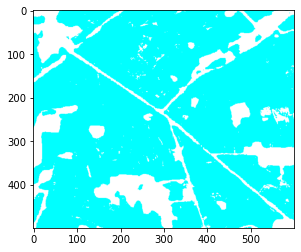

In [218]:
plt.imshow(list_final[0])

In [113]:
sum(sum(sum(abs(list_final[0]-all_pic3[0]/255))))

374161.0

In [76]:
#欧式距离

In [77]:
o_distance=[]

In [78]:
for i in range(8):
    o_distance.append((sum(sum(sum((all_pic3[i]/255-list_final[i])**2))))**0.5)

In [79]:
o_distance

[611.6870114691009,
 618.5523421667725,
 672.5882841679596,
 653.2319649251712,
 740.3147979069445,
 611.1775519437866,
 689.740530924492,
 615.8270861207714]

In [80]:
o_distance1=[]

In [81]:
for i in range(8):
    o_distance1.append((sum(sum(sum((all_pic3[i]/255-list_final[i]/255)**2))))**0.5)

In [ ]:
#均值

In [82]:
aver_all=[]
aver_final=[]

In [83]:
for i in range(8):
    aver_all.append(sum(sum(sum(all_pic3[i]/255)))/(500*600*3))
    aver_final.append(sum(sum(sum(list_final[i])))/(500*600*3))

In [84]:
for i in range(8):
    print(abs(aver_all[i]-aver_final[i]))

0.10330777777777778
0.13004111111111116
0.0713366666666666
0.006248888888888859
0.2681111111111111
0.14046222222222227
0.09571111111111108
0.12564555555555557


In [85]:
#方差

In [88]:
var_1=[]

In [89]:
var_2=[]

In [90]:
for i in range(8):
    var_1.append(sum(sum(sum(all_pic3[i]/255-aver_all[i])**2))/(500*600*3-1))
    var_2.append(sum(sum(sum(list_final[i]/255-aver_final[i])**2))/(500*600*3-1))

In [91]:
var_1

[3.008920654356262,
 11.169690188544385,
 4.643723626359552,
 12.753187497986007,
 19.87239965822188,
 4.670601717335216,
 8.2531044978939,
 6.472885186539136]

In [92]:
var_2

[264.08977268832683,
 251.64885025282706,
 295.47419780564286,
 281.3505363286954,
 334.7617832852644,
 253.72275490577206,
 298.6921010169311,
 252.4023557593534]

In [100]:
for i in range(8):
    print(abs(var_1[i]-var_2[i]))

261.0808520339706
240.47916006428267
290.8304741792833
268.5973488307094
314.88938362704255
249.05215318843685
290.4389965190372
245.92947057281427


In [101]:
#标准差/均方差

In [102]:
std_1=[]
std_2=[]

In [103]:
for i in range(8):
    std_1.append(var_1[i]**0.5)
    std_2.append(var_2[i]**0.5)

In [104]:
std_1

[1.7346240671558382,
 3.3421086440366334,
 2.1549300745870044,
 3.5711605253735104,
 4.457846975639908,
 2.1611574948011576,
 2.8728216961541313,
 2.5441865471185747]

In [105]:
std_2

[16.250839137974594,
 15.863443833317753,
 17.18936292611343,
 16.773506977632774,
 18.29649647569896,
 15.928677123533268,
 17.282711043610348,
 15.887175827042181]

In [106]:
#均方误差